In [1]:
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import becquerel as bq
import scipy.integrate as integrate
import math as m
import importlib
import os
import sys
sys.path.append("../")
import PF
import ROI
import analysis_methods as am

In [30]:
importlib.reload(PF)
importlib.reload(ROI)
importlib.reload(am)

<module 'analysis_methods' from '..\\analysis_methods.py'>

In [3]:
#path = r'C:\Users\Daniel\Desktop\Radwatch\radwatch-analysis'
path = r'C:\Users\ahanks\Google Drive\RadWatch\NAA\2019 November'
spec = path + r'\NAA_eff_calibration_long.Spe'
bg = path + r'\background-long.Spe'
#ecal = path + r'\E-calibration-Eu152.Spe'
#this set of eff data was already energy calibrated

spec = bq.Spectrum.from_file(spec)
bg = bq.Spectrum.from_file(bg)
#ecal = bq.Spectrum.from_file(ecal)

counts = spec.counts_vals
energies = spec.bin_centers_kev
bg_counts = bg.counts_vals

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\NAA\2019 November\NAA_eff_calibration_long.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\NAA\2019 November\background-long.Spe


In [4]:
#Find Lu-176, La-138, K-40
source_isotopes = np.array(['Lu_176_1','Lu_176_2','Lu_176_3',
                          'La_138_1','La_138_2',
                           'K-40']); #get counts under the peak subtrack the background
source_energies = np.array([88.34,
                            201.83,306.78,
                           788.742,1435.795,
                           1460.83]);
source_activities = np.array([16.259,
                              16.259,16.259,
                             11.646,11.646,
                              424.65]);#Bq/L, update this with correct mass, by .0098 g
branching_ratio = np.array([0.11,
                            0.86,0.94,
                           0.34,0.66,
                           0.11]);
activities_uncer = np.array([1.6259,
                             1.6259,1.6259,
                            0.02329,0.02329,
                            0.8493])
'''The real source energies:
Lu-176: 88.34, 201.83, 306.78
La-138: 788.742,1435.795
K-40: 1460.83'''
source_activities = source_activities * .0098 #accounting for NAA sample weight
activities_uncer = activities_uncer * .0098
print(source_activities)
print(type(source_energies[0]))
type(88.34)

[0.1593382 0.1593382 0.1593382 0.1141308 0.1141308 4.16157  ]
<class 'numpy.float64'>


float

In [5]:
roi = ROI.ROI(spec, bg, source_energies, 0)#0 subtracts bg after ROI is applied, (diff cal can work)
#roi_counts, roi_unc = roi.get_counts()
#print(roi_counts)
#print(roi_unc)

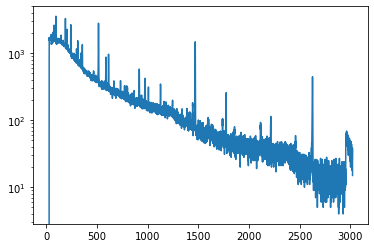

In [6]:
plt.plot(energies,counts)
plt.yscale('log')

In [47]:
roi.set_sideband(float(source_energies[0]), 4, [[-2, -1.0], [-.5, .7], [2.0, 4.0]])
roi.set_sideband(float(source_energies[1]), 5, [[-1.8, -.5], [-.4, .8], [.9, 1.8]])
roi.set_sideband(float(source_energies[2]), 5, [[-5, -3], [-.4, 1], [2, 3.4]])
roi.set_sideband(float(source_energies[3]), 5, [[-2, -.8], [-.3, 1.5], [2.5, 3.5]])
roi.set_sideband(float(source_energies[4]), 9, [[-1.5, -.5], [-.05, 1.2], [1.5, 2.4]])
roi.set_sideband(float(source_energies[5]), 9, [[-1.4, -.4], [-.05, 1.3], [2, 3]])

C:\Users\ahanks\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



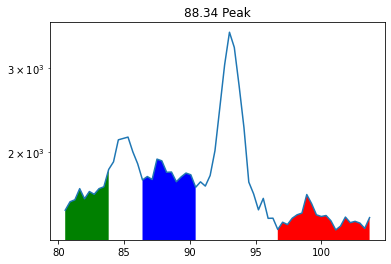

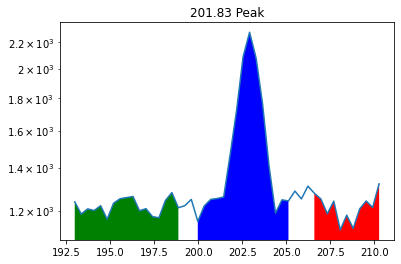

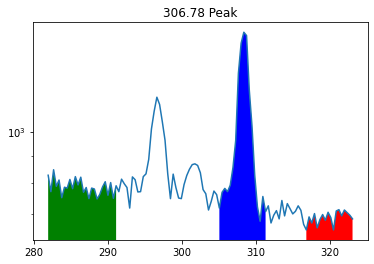

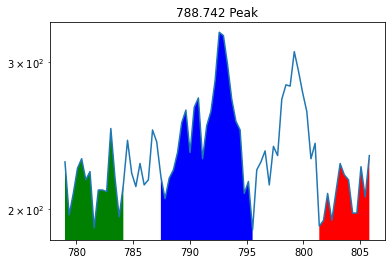

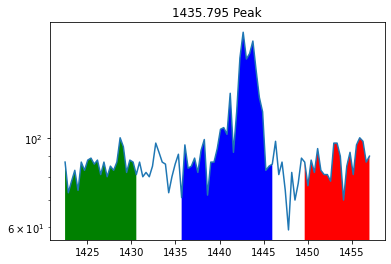

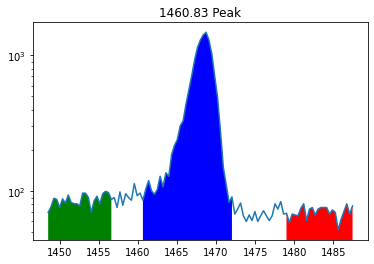

In [48]:
for i in range(len(source_energies.tolist())):
    roi.plot_peak_region(spec, source_energies, source_energies.tolist()[i])

In [49]:
roi.set_sideband(float(source_energies[0]), 4, [[-2, -1.0], [-.5, .7], [2.0, 4.0]], 1)
roi.set_sideband(float(source_energies[1]), 4, [[-1.8, -.5], [-.4, .6], [1.0, 2.0]],1)
roi.set_sideband(float(source_energies[2]), 5, [[-5, -3], [-.4, .6], [.8, 3]],1)
roi.set_sideband(float(source_energies[3]), 7, [[-2, -.8], [-.1, 1.1], [1.9, 3]],1)
roi.set_sideband(float(source_energies[4]), 8, [[-2.8, -.8], [-.5, .6], [1, 2.5]],1)
roi.set_sideband(float(source_energies[5]), 10, [[-4, -2], [-.8, 1.2], [2, 3]],1)

C:\Users\ahanks\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



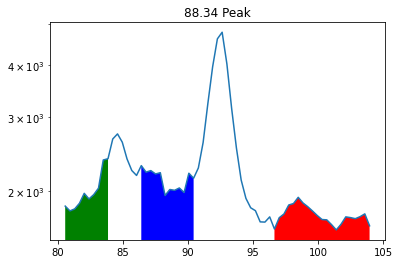

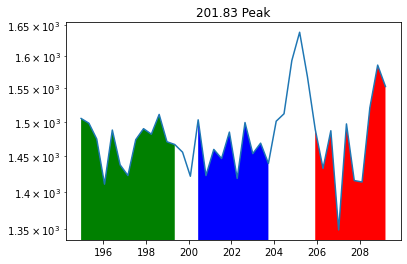

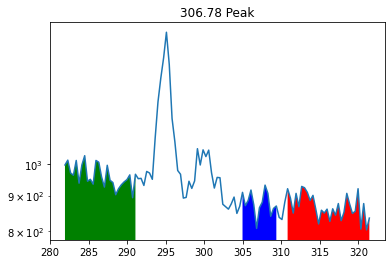

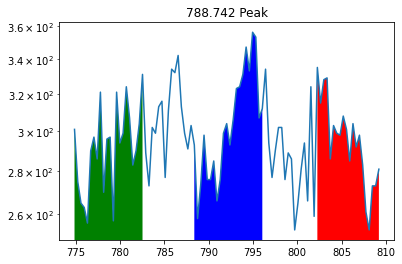

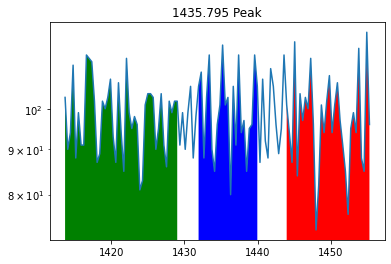

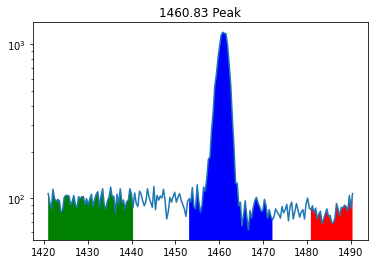

In [50]:
for i in range(len(source_energies.tolist())):
    roi.plot_peak_region(bg, source_energies, source_energies.tolist()[i], 1)

In [51]:
roi_counts=[]
roi_unc =[]
roi_counts, roi_unc = roi.get_counts()

C:\Users\ahanks\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



background spec sidebands 20399.62770546838
bg peak counts 23166.631795722496
signal bg 18575.1
signal peak 21562.0
background spec sidebands 13370.251604367742
bg peak counts 13250.133499931546
signal bg 14727.333333333334
signal peak 18980.000000000004
background spec sidebands 10796.043712547254
bg peak counts 10368.485862265772
signal bg 13265.884615384617
signal peak 17368.0
background spec sidebands 5864.26639334425
bg peak counts 6071.881164089461
signal bg 7575.131313131313
signal peak 8447.0
background spec sidebands 2036.769433145104
bg peak counts 2083.862354671062
signal bg 2184.5213032581455
signal peak 2912.0000000000005
background spec sidebands 4338.631877633779
bg peak counts 13436.192638741462
signal bg 2730.2492877492873
signal peak 14809.0


In [52]:
print(roi_counts)
print(roi_unc)

[219.89590974588646, 4372.784771102866, 4529.673234896865, 664.2539161234763, 680.385775215897, 2981.1899511430292]
[261.4605241001767, 221.4070391737061, 221.59691566373064, 150.49870227080262, 83.58435733015045, 170.31960631647738]


In [53]:
eff,eff_uncer = am.efficiency(roi_counts,source_activities,branching_ratio,roi_unc,activities_uncer,spec.livetime)
print(eff,eff_uncer)

[0.012288762988894395, 0.031256716430795375, 0.029622569166312247, 0.016767022759679527, 0.008847326142475943, 0.0063788643723635035] [0.014663163771726459, 0.0035034996186327754, 0.00329773587544629, 0.0037990193231848884, 0.0010870245581936896, 0.00036465679716208454]


In [ ]:
plot_eff = am.Efficiency(source_energies,eff,eff_uncer)

plot_eff.fitting()
plot_eff.plotter_pretty(0.04, save=True)

In [57]:
plot_eff.save_fit()

Saving efficiency curve to  eff_calibration_parameters.json
Saving fit parameters:  [-0.15943014 -0.7649445  -1.5632929  -2.06866782 -4.91306622]
Saving fit covariance:  [[1.38896920e-01 7.44199103e-01 1.18468009e+00 5.33886634e-01
  8.50812929e-03]
 [7.44199103e-01 4.01232969e+00 6.45436269e+00 2.96960151e+00
  5.31261261e-02]
 [1.18468009e+00 6.45436269e+00 1.05734619e+01 5.04962792e+00
  1.11438086e-01]
 [5.33886634e-01 2.96960151e+00 5.04962792e+00 2.61030800e+00
  9.04648425e-02]
 [8.50812929e-03 5.31261261e-02 1.11438086e-01 9.04648425e-02
  2.28224161e-02]]


In [58]:
test_eff = am.Efficiency()
test_eff.set_parameters()

Loaded fit parameters 0-4: [-0.15943014 -0.7649445  -1.5632929  -2.06866782 -4.91306622]
Loaded fit covariance: [[1.38896920e-01 7.44199103e-01 1.18468009e+00 5.33886634e-01
  8.50812929e-03]
 [7.44199103e-01 4.01232969e+00 6.45436269e+00 2.96960151e+00
  5.31261261e-02]
 [1.18468009e+00 6.45436269e+00 1.05734619e+01 5.04962792e+00
  1.11438086e-01]
 [5.33886634e-01 2.96960151e+00 5.04962792e+00 2.61030800e+00
  9.04648425e-02]
 [8.50812929e-03 5.31261261e-02 1.11438086e-01 9.04648425e-02
  2.28224161e-02]]


In [60]:
test_eff.plotter_pretty(0.04)